In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors
from chemaphy import Statistics as stats
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
data = sns.load_dataset("iris")
iris = pd.DataFrame(data)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
x = iris.drop(columns = "species",axis = 1)
p = preprocessing.LabelEncoder()
y = p.fit_transform(iris["species"])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3)
model = linear_model.LogisticRegression(max_iter=3000)
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
pred

array([1, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       0])

In [5]:
metrics.accuracy_score(ytest,pred)

0.9555555555555556

In [6]:
m = metrics.confusion_matrix(ytest,pred)
m

array([[15,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 16]], dtype=int64)

<AxesSubplot: >

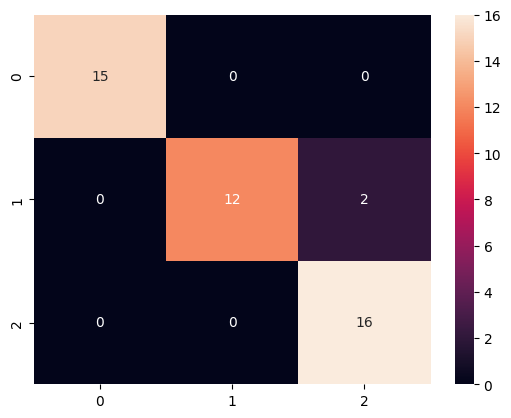

In [7]:
sns.heatmap(m,annot=True)

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

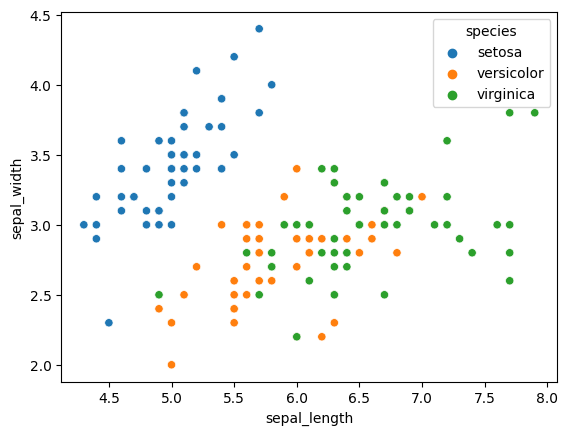

In [8]:
sns.scatterplot(x="sepal_length",y="sepal_width",data=iris,hue="species")

In [9]:
stats.MeanSquaredError(ytest,pred)

0.044444444444444446

In [10]:
stats.RootMeanSquaredError(ytest,pred)

0.21081851067789195